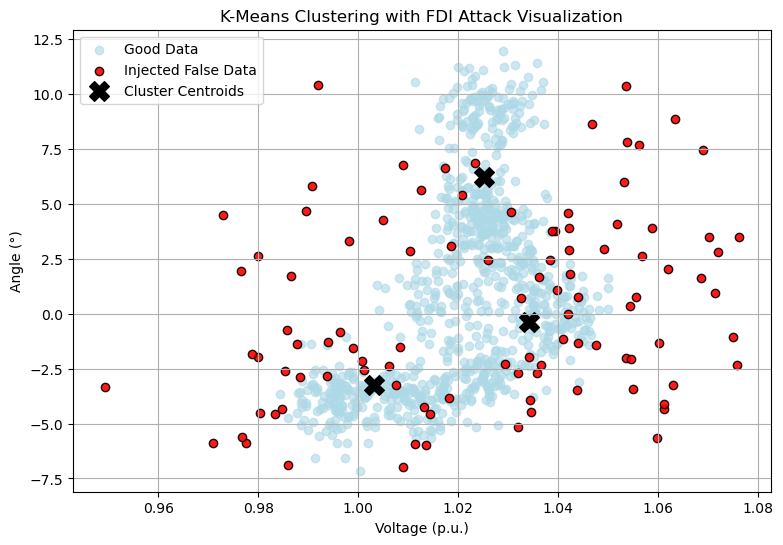

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "C:/Users/randh/OneDrive/Documents/internship/bks sir/1000_data.xlsx"
data = pd.read_excel(file_path, sheet_name="Sheet1")

# Extract Voltage and Angle
X = data[["Voltage", "Angle"]]

# Simulate FDI Attack: Inject false data into 10% of points
np.random.seed(42)
attack_indices = np.random.choice(len(X), size=int(0.1 * len(X)), replace=False)

# Create a new column to mark attacked data
data["Is_Attacked"] = 0  # 0 = good, 1 = attacked
data.loc[attack_indices, "Is_Attacked"] = 1

# Inject false data
data.loc[attack_indices, "Voltage"] += np.random.uniform(-0.05, 0.05, size=len(attack_indices))
data.loc[attack_indices, "Angle"] += np.random.uniform(-2, 2, size=len(attack_indices))

# Standardize data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[["Voltage", "Angle"]])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(X_scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot data
plt.figure(figsize=(9,6))

# Good data
good_data = data[data["Is_Attacked"] == 0]
plt.scatter(good_data["Voltage"], good_data["Angle"], c="lightblue", label="Good Data", alpha=0.6)

# Bad (FDI) data
bad_data = data[data["Is_Attacked"] == 1]
plt.scatter(bad_data["Voltage"], bad_data["Angle"], c="red", label="Injected False Data", alpha=0.9, edgecolor='black')

# Plot cluster centroids
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='X', s=200, label="Cluster Centroids")

# Labels and Legend
plt.xlabel("Voltage (p.u.)")
plt.ylabel("Angle (°)")
plt.title("K-Means Clustering with FDI Attack Visualization")
plt.legend()
plt.grid(True)
plt.show()
